In [13]:
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilsVisualize import getModelDataNum
import numpy as np
import matplotlib.colors as mcolors

In [14]:
mode = "TEST"
modelNames = ["p2", "p4", "p8", "p16", "m1", "m2", "m4", "m8", "m16", "m32"]
# visualizeMode = "PHI_MAPE"
# visualizeMode = "PHI_MSE"
# visualizeMode = "FE_DIFFERENCE"
visualizeMode = "PHI_AVE"
cutoffRow = None
showPlot = False

if visualizeMode == "PHI_MAPE":
    filenamePrefix = 'MAPE-violin'
    ylabel = '$\phi$-Prediction Error'
elif visualizeMode == "FE_DIFFERENCE":
    filenamePrefix = 'FE_DIFF-violin'
    ylabel = 'Scaled Free Energy Error'
elif visualizeMode == "PHI_AVE":
    filenamePrefix = 'PHI_AVE-violin'
    ylabel = '$\phi_{ave}$-Prediction Error' 
else:
    filenamePrefix = 'VIOLIN'
    ylabel = 'Value'

my_pal = {
    "p2": "g",
    "p4": "g",
    "p8": "g",
    "p16": "g",
    "m1": "r",
    "m2": "r",
    "m4": "r",
    "m8": "r",
    "m16": "r",
    "m32": "r",
}

In [15]:
dfLongArray = []
for modelName in modelNames:
    df, dfLong, dfWide, _ = getModelDataNum(
        modelName, mode, visualizeMode=visualizeMode, cutoffRow=cutoffRow
    )
    print(modelName, df.shape)
    dfLongArray.append(dfLong)

    if showPlot:    
        sns.set_theme()
        fig, ax = plt.subplots()
        xp = dfWide.index.values
        yp = dfWide["median"].values
        errU = dfWide["upper_whisker"]
        errL = dfWide["lower_whisker"]

        ax.plot(xp, yp, "--*", label=modelName)
        ax.fill_between(xp, errU, errL, color="b", alpha=0.2)
        ax.set_title(visualizeMode)
        ax.set_xlabel("Time")
        ax.set_ylabel(visualizeMode)
        plt.legend()

        fig, ax = plt.subplots()
        numBar = 8
        tArrayPred = df.index.values
        idxList = np.linspace(0, tArrayPred.shape[0] - 1, numBar).astype(int)
        tList = tArrayPred[idxList]
        filt = dfLong["time"].isin(tList)
        ax = sns.boxplot(data=dfLong[filt], x="time", y="value", whis=1.5)


plt.show()
dfLongAppended = pd.concat(dfLongArray)

p2 (801, 50)
p4 (401, 50)
p8 (201, 50)
p16 (101, 44)
m1 (1601, 50)
m2 (801, 50)
m4 (401, 50)
m8 (201, 50)
m16 (101, 50)
m32 (51, 50)


In [16]:
dfLongAppended.shape

(232394, 4)

In [17]:
colors = list(mcolors.TABLEAU_COLORS.values())
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


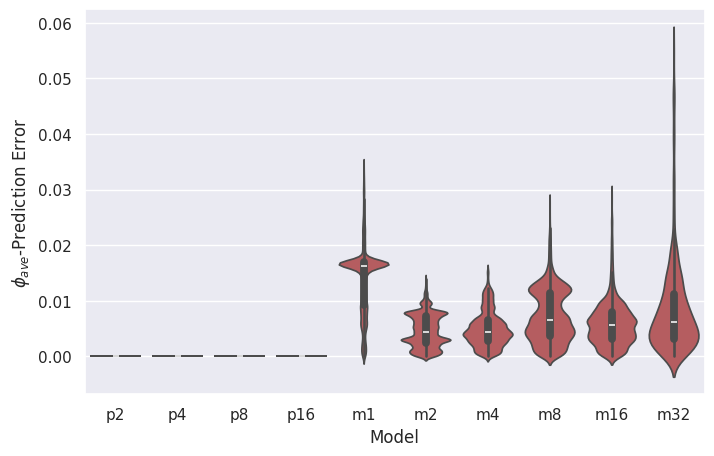

In [18]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8, 5))

# Using density_norm='width' parameter to normalize the violin plot so that they can be compared
# https://stackoverflow.com/a/56357825
sns.violinplot(data=dfLongAppended, x="model", y="value", hue="model", legend=False, ax=ax, density_norm='width', palette=my_pal)
ax.set_xlabel("Model")
ax.set_ylabel(ylabel)
cwd = sys.path[0]
cutoffRow = 'None' if cutoffRow is None else cutoffRow
filename = f'{filenamePrefix}-Cut-{cutoffRow}.png'
filePath = os.path.join(os.getcwd(), 'o8_visualize', filename)
plt.savefig(filePath, dpi=300, bbox_inches="tight")